<a href="https://colab.research.google.com/github/seiside/LECNEP/blob/main/kik_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install obspy

In [ ]:
import obspy, obspy.io.nied.knet, obspy.core.stream
import requests, getpass
import tarfile

In [ ]:
base_url = 'https://www.kyoshin.bosai.go.jp/kyoshin/download/kik/6comp'
evid = '20170901163000'
stid = 'EHMH05'
url = f'{base_url}/{evid[:4]}/{evid[4:6]}/{evid}/{stid}{evid[2:12]}.tar.gz'

username: ide
password: ··········


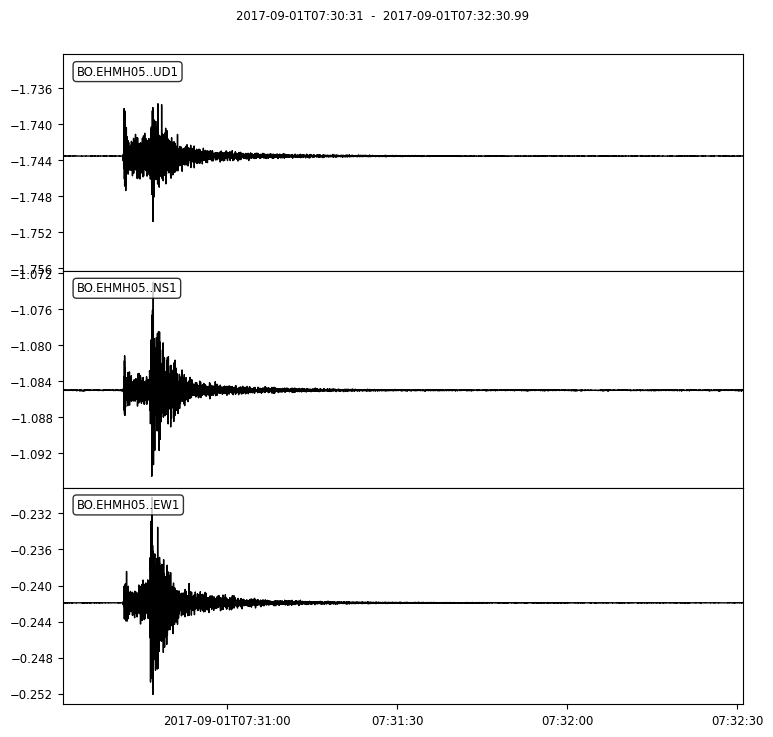

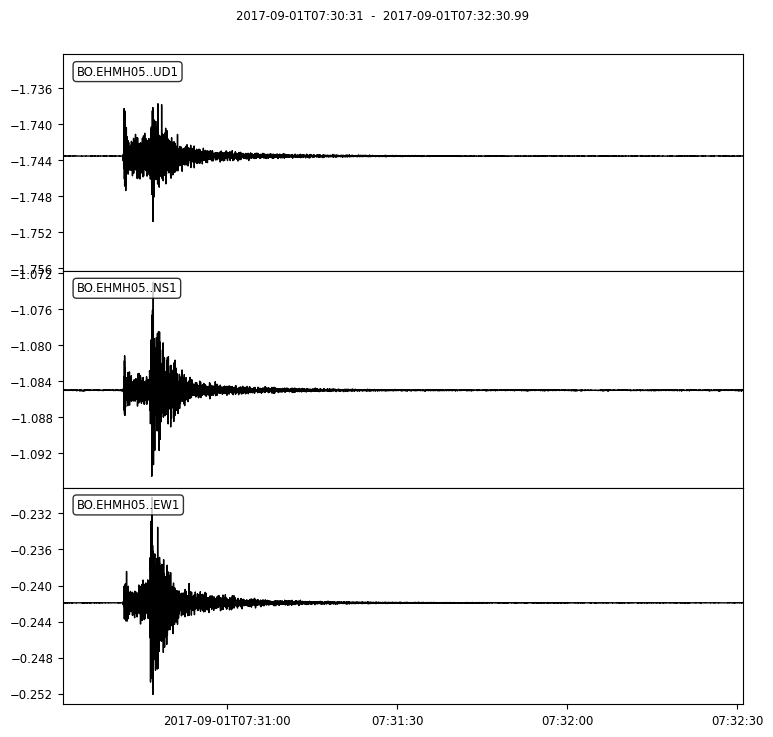

In [ ]:
#url = 'https://www.kyoshin.bosai.go.jp/kyoshin/download/kik/6comp/2017/09/20170901163000/EHMH051709011630.tar.gz'
with requests.session() as session:
    user = input('username: ')
    password = getpass.getpass('password: ')
    session.auth = user, password
    r = session.get(url)
    with open("tmp.tar.gz", 'wb') as fout:
        fout.write(r.content)
        with tarfile.open('tmp.tar.gz', 'r:gz') as t:
            t.extractall()

st=obspy.core.stream.Stream()
st.append(obspy.io.nied.knet._read_knet_ascii(stid+evid[2:12]+".UD1")[0])
st.append(obspy.io.nied.knet._read_knet_ascii(stid+evid[2:12]+".NS1")[0])
st.append(obspy.io.nied.knet._read_knet_ascii(stid+evid[2:12]+".EW1")[0])
st.plot()

In [ ]:
!ls

EHMH051709011630.EW1  EHMH051709011630.rsp.ps.gz   sample_data
EHMH051709011630.EW2  EHMH051709011630.UD1	   tmp.kwin
EHMH051709011630.NS1  EHMH051709011630.UD2	   tmp.tar.gz
EHMH051709011630.NS2  EHMH051709011630.wave.ps.gz
